<a href="https://colab.research.google.com/github/richieyuyongpoh/Practical-R-series/blob/main/Turning_Data_into_Actionable_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Turning Data into Actionable Insights**

Prepared by:
    
Dr. Yong Poh Yu
<br><br>

LinkedIn: [Yong Poh Yu](https://www.linkedin.com/in/yong-poh-yu/)

Github: [Practical R Series](https://github.com/richieyuyongpoh/Practical-R-series/tree/main/Introduction) 



# **Notice**
The practical handout is open-source and under 
[GNU General Public License v3.0](https://www.gnu.org/licenses/gpl-3.0.en.html).

Please cite my repository/work if you are using any contents written in this practical handout. 

## **Use Case 1: Customer Segmentation**

[Reference](https://anthonysmoak.com/2018/12/24/connecting-tableau-with-r/)  

### Motivation

Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs. 

The most common ways in which businesses segment their customer base are:
 

*   Customer Background, eg: geographical information
*   Behavioral Data, eg: spending habit



### Advantages of Customer Segmentation

*   Determine appropriate product pricing.
*   Develop customized marketing campaigns.
*   Design an optimal distribution strategy.
*   Choose specific product features for deployment.
*   Prioritize new product development efforts.


### Introduction to *k*-means

*   Specify number of clusters K.
*   Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.
*   Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.

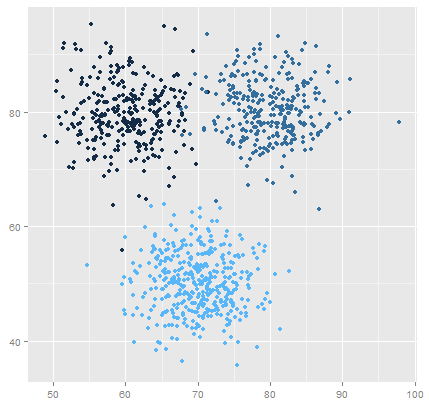



(photo credit: [HERE](https://towardsdatascience.com/customer-segmentation-using-k-means-clustering-d33964f238c3) )

### *k*-means (in English)

To simply the analytical processes, i want to design a solution that helps to automatically group my customers into few groups. Every group has its own uniqueness. There is/are significant differences between any two groups. 

For instance, **Group 2 members (auto grouped by machine@computer) tend to buy Grocery, Milk and Detergent Paper together, with higher amount of expenses** . 

*k*-means can easily group @segmentize the customers such a way. 

### Real-time Demo

Go to the [page](https://www.richieyyptutorialpage.com/demo-r-series/customer-segmention-using-k-means)



### Practical Codes (in R)

Note: For the following codes, we shall just roughly *touch and go* first. The details of each function@syntax will be discussed in the subsequent subsections. 

1: Upload [`Wholesale customers data.csv`]() into current working environment. 

This data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

For more information, please refer to this [page](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [1]:
myData <- read.csv("Wholesale customers data.csv")
myData

CustomerId,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2,3,12669,9656,7561,214,2674,1338
2,2,3,7057,9810,9568,1762,3293,1776
3,2,3,6353,8808,7684,2405,3516,7844
4,1,3,13265,1196,4221,6404,507,1788
5,2,3,22615,5410,7198,3915,1777,5185
6,2,3,9413,8259,5126,666,1795,1451
7,2,3,12126,3199,6975,480,3140,545
8,2,3,7579,4956,9426,1669,3321,2566
9,1,3,5963,3648,6192,425,1716,750


2: Observe the summary of the dataset

In [2]:
summary(myData)

   CustomerId       Channel          Region          Fresh       
 Min.   :  1.0   Min.   :1.000   Min.   :1.000   Min.   :     3  
 1st Qu.:110.8   1st Qu.:1.000   1st Qu.:2.000   1st Qu.:  3128  
 Median :220.5   Median :1.000   Median :3.000   Median :  8504  
 Mean   :220.5   Mean   :1.323   Mean   :2.543   Mean   : 12000  
 3rd Qu.:330.2   3rd Qu.:2.000   3rd Qu.:3.000   3rd Qu.: 16934  
 Max.   :440.0   Max.   :2.000   Max.   :3.000   Max.   :112151  
      Milk          Grocery          Frozen        Detergents_Paper 
 Min.   :   55   Min.   :    3   Min.   :   25.0   Min.   :    3.0  
 1st Qu.: 1533   1st Qu.: 2153   1st Qu.:  742.2   1st Qu.:  256.8  
 Median : 3627   Median : 4756   Median : 1526.0   Median :  816.5  
 Mean   : 5796   Mean   : 7951   Mean   : 3071.9   Mean   : 2881.5  
 3rd Qu.: 7190   3rd Qu.:10656   3rd Qu.: 3554.2   3rd Qu.: 3922.0  
 Max.   :73498   Max.   :92780   Max.   :60869.0   Max.   :40827.0  
   Delicassen     
 Min.   :    3.0  
 1st Qu.:  408.2 

3: Is there any outlier? 

demo: go to this [page](https://www.richieyyptutorialpage.com/demo-r-series/exploratory-data-analysis)

In [ ]:
install.packages("tidyr")

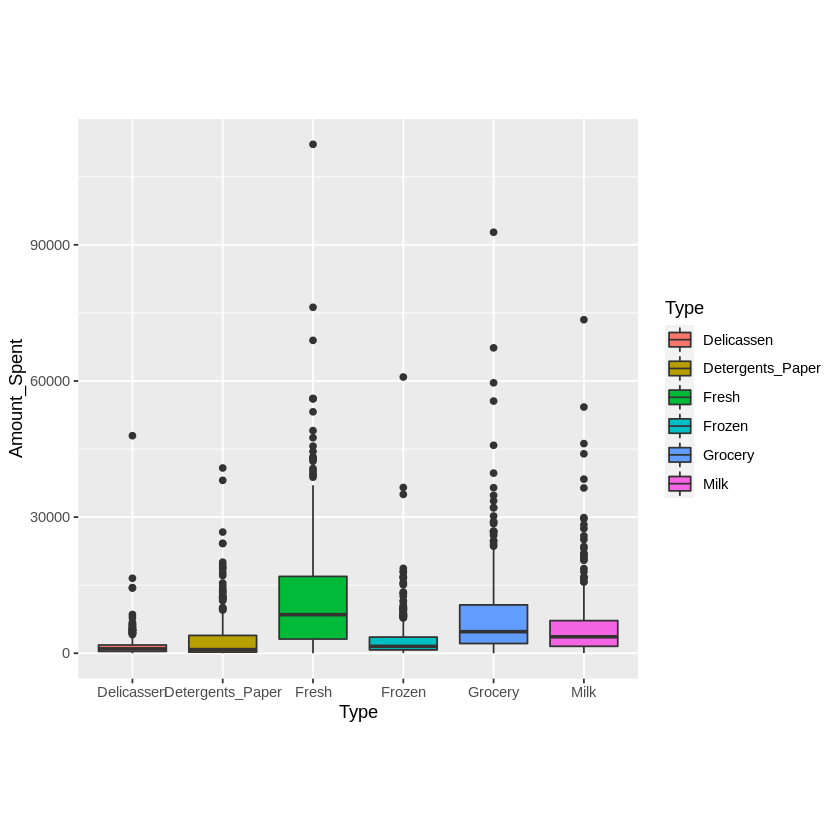

In [12]:
library(ggplot2)
library(tidyr)
library(dplyr)
myData %>% select(CustomerId, Fresh, Milk, Grocery,Frozen,Detergents_Paper, Delicassen) %>%
  pivot_longer( cols = c(Fresh, Milk, Grocery,Frozen,Detergents_Paper, Delicassen), 
                names_to = "Type", 
                values_to = "Amount_Spent") %>%
  ggplot(aes(x = Type, y = Amount_Spent, fill = Type)) +
    geom_boxplot() 

4: How about *k*-means? 

In [33]:
selectedData <- select (myData,Fresh:Delicassen)
km_res <- kmeans (selectedData,centers = 5,nstart = 20)
results_5clusters <- factor(km_res$cluster)
results_5clusters

[1] 5 5 5 5 2 5 5 5 5 1 1 5 2 2 2 5 1 5 2 5 2 5 2 1 2 2 5 2 1 4 2 5 2 2 5 5 2
 [38] 1 1 4 2 2 1 1 5 1 1 3 5 1 5 5 4 1 2 5 1 1 5 5 5 3 5 1 5 3 5 2 5 5 2 2 5 2
 [75] 5 2 5 1 5 5 5 1 5 2 5 3 3 4 5 2 5 5 1 2 1 5 5 5 5 5 1 1 5 4 2 2 5 1 5 1 5
[112] 1 2 2 2 5 5 5 2 5 2 5 5 5 2 4 2 2 5 4 5 5 2 5 5 5 5 5 5 5 2 2 4 5 2 1 5 5
[149] 5 2 2 5 2 5 5 1 1 2 5 1 5 5 2 1 5 1 5 5 5 5 1 1 5 1 5 1 4 5 5 5 5 4 1 4 5
[186] 5 5 5 1 1 2 5 5 1 5 2 2 5 5 5 1 1 2 5 5 1 5 5 5 1 2 3 5 5 5 1 1 2 1 5 2 5
[223] 5 5 5 5 2 5 5 5 5 5 2 5 2 5 5 2 5 4 2 2 2 5 5 1 5 5 2 5 5 1 5 2 5 2 5 5 4
[260] 4 5 5 2 5 1 1 1 2 1 2 5 5 5 4 5 5 2 5 5 2 5 5 4 2 4 4 5 2 2 4 5 5 5 1 2 5
[297] 2 5 5 5 2 1 5 1 1 1 1 2 5 1 5 2 1 5 5 1 5 5 5 1 5 5 2 5 2 4 5 5 2 5 5 1 2
[334] 3 2 2 5 5 5 5 5 5 5 1 5 5 1 2 5 1 5 1 5 1 2 5 2 1 5 5 2 5 5 5 5 5 5 5 2 5
[371] 4 2 5 2 5 5 1 4 5 5 2 2 2 5 1 5 5 2 5 5 5 5 5 2 5 5 5 5 5 5 5 2 2 2 2 5 2
[408] 1 5 5 5 5 5 5 5 5 1 5 1 5 1 2 2 2 2 5 1 2 5 5 1 5 2 5 2 2 4 1 5 5
Levels: 1 2 3 4 5

In [34]:
myDataClustered <- cbind(myData,results_5clusters)
myDataClustered

CustomerId,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,results_5clusters
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,2,3,12669,9656,7561,214,2674,1338,5
2,2,3,7057,9810,9568,1762,3293,1776,5
3,2,3,6353,8808,7684,2405,3516,7844,5
4,1,3,13265,1196,4221,6404,507,1788,5
5,2,3,22615,5410,7198,3915,1777,5185,2
6,2,3,9413,8259,5126,666,1795,1451,5
7,2,3,12126,3199,6975,480,3140,545,5
8,2,3,7579,4956,9426,1669,3321,2566,5
9,1,3,5963,3648,6192,425,1716,750,5


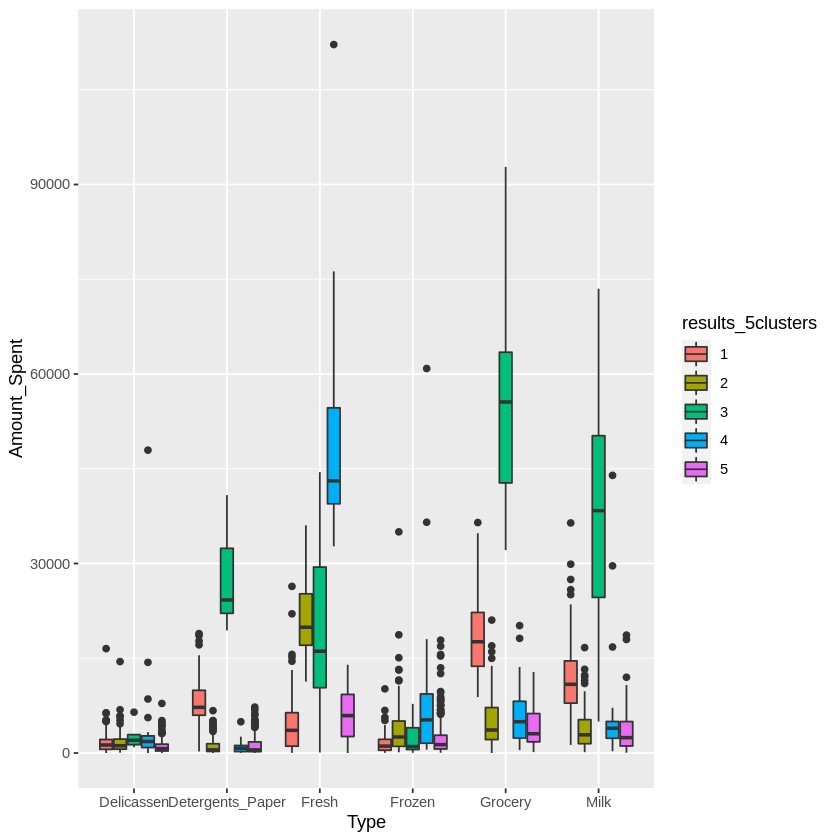

In [35]:
myDataClustered %>% select(CustomerId, Fresh, Milk, Grocery,Frozen,Detergents_Paper, Delicassen,results_5clusters) %>%
  pivot_longer( cols = c(Fresh, Milk, Grocery,Frozen,Detergents_Paper, Delicassen), 
                names_to = "Type", 
                values_to = "Amount_Spent") %>%
  ggplot(aes(x = Type, y = Amount_Spent, fill = results_5clusters)) +
    geom_boxplot() 